In [41]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ochunGRN as oGRN
plt.rcParams['figure.figsize']= [12, 7]

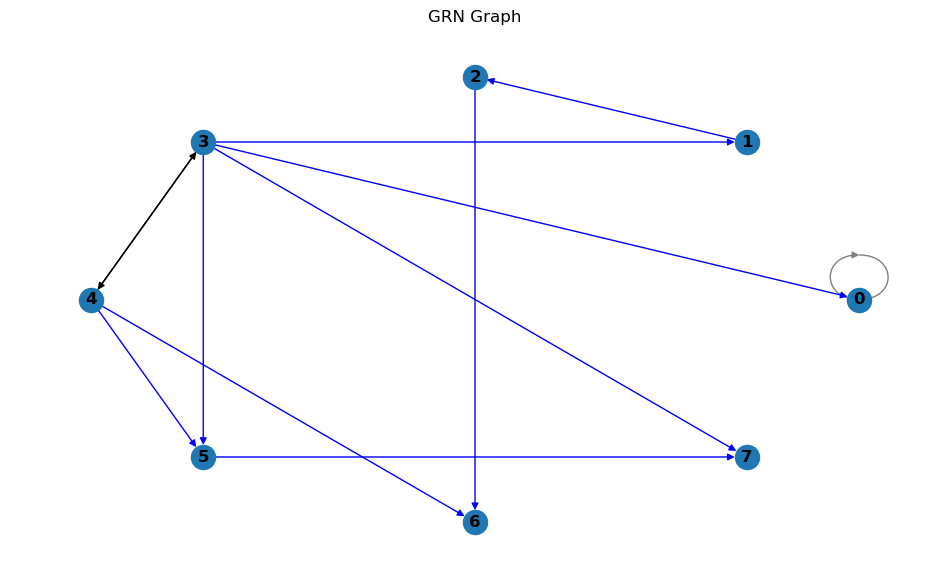

In [42]:
GENESNB = 8
test = oGRN.randomGrn(GENESNB, 0.2, 0.1)
oGRN.plotGraph(test)

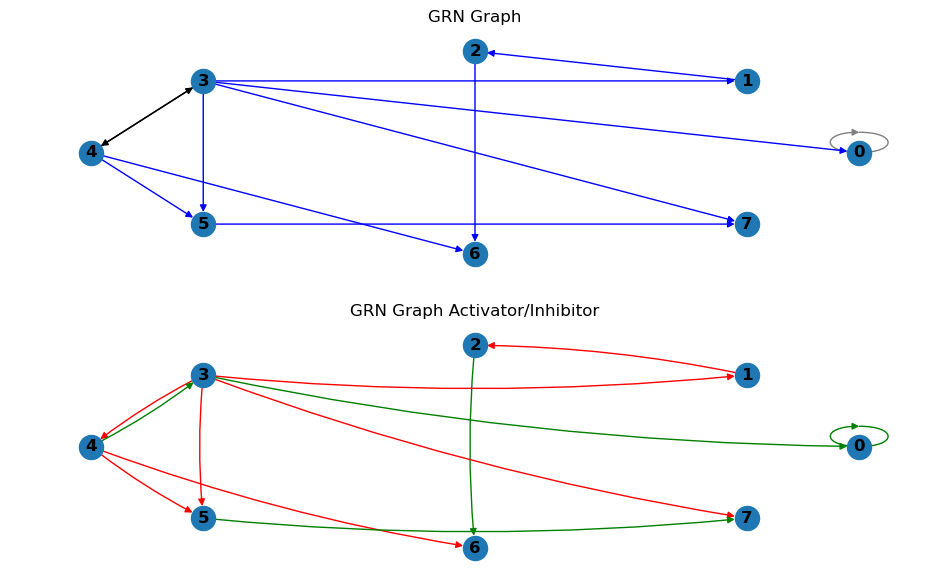

In [43]:
oGRN.plotGraph(test, actInhPlotBool=True, saveName="images/actInhPlot")

{'Graph': <networkx.classes.digraph.DiGraph object at 0x0000015A54C55250>, 'genesNb': 8, 'autoRG': 0.0, 'duoRG': 0.45454545454545453, 'AdjMatrice': array([[ 0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0, -1, -1,  0,  0],
       [ 0,  1,  0,  1,  0, -1, -1,  0],
       [ 0, -1,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0],
       [-1,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0]]), 'meanClustering': 0.45799278846153846, 'subGraph': {'0-2-1': 'C-E', '0-2-3': 'C-E', '0-2-5': 'C-E', '0-2-6': 'dC', '1-2-3': '5edges', '1-2-4': 'SCascade', '1-2-5': '5edges', '1-2-6': 'SCascade', '1-4-3': 'C-E', '1-4-5': 'C-D', '1-4-7': 'C-E', '1-5-3': 'Cascade', '2-3-5': 'SCascade', '2-3-6': 'SCascade', '2-5-6': 'SCascade', '2-6-7': 'C-D', '6-0-7': 'Fan-Out', '6-7-4': 'Cascade'}}


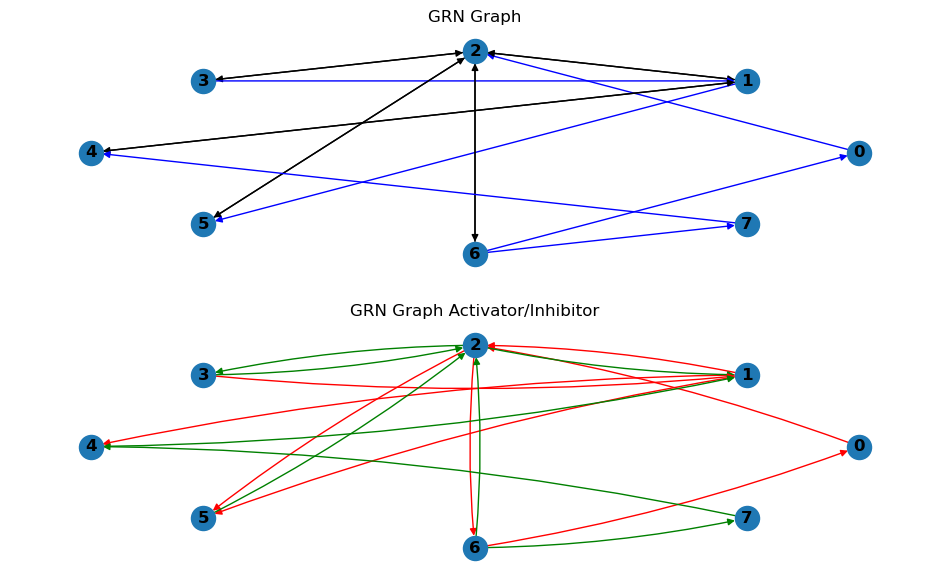

In [44]:
AdjMatrice = np.array([[0, 0, -1, 0, 0, 0, 0, 0],
                       [0, 0, -1, 0, -1, -1, 0, 0],
                       [0, 1, 0, 1, 0, -1, -1, 0],
                       [0, -1, 1, 0, 0, 0, 0, 0],
                       [0, 1, 0, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [-1, 0, 1, 0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 1, 0, 0, 0]])
test2 = oGRN.GrnFromAdj(AdjMatrice)
print(test2)
oGRN.plotGraph(test2, True)

In [45]:
FFLmotif = oGRN.randomGrn(100,0.1,0.02)
DictFFL=FFLmotif["subGraph"]
motifs = {v:0 for v in DictFFL.values()}
N=len(DictFFL)
print(N)
for i in DictFFL.keys():
    motifs[DictFFL[i]]+=1
    if DictFFL[i]=='FFL':
        print(i)
print(sorted(motifs.items(), key=lambda item: item[1]))
print(motifs['FFL']/N)

924
0-8-9
0-9-14
0-30-2
0-30-41
0-79-2
2-19-23
2-23-70
3-6-5
3-6-7
3-6-48
3-12-5
8-10-20
10-17-53
13-22-85
13-61-19
13-84-15
16-17-60
19-23-32
62-94-97
[('C-E', 10), ('C-D', 15), ('FFL', 19), ('Fan-In', 106), ('Cascade', 345), ('Fan-Out', 429)]
0.020562770562770564


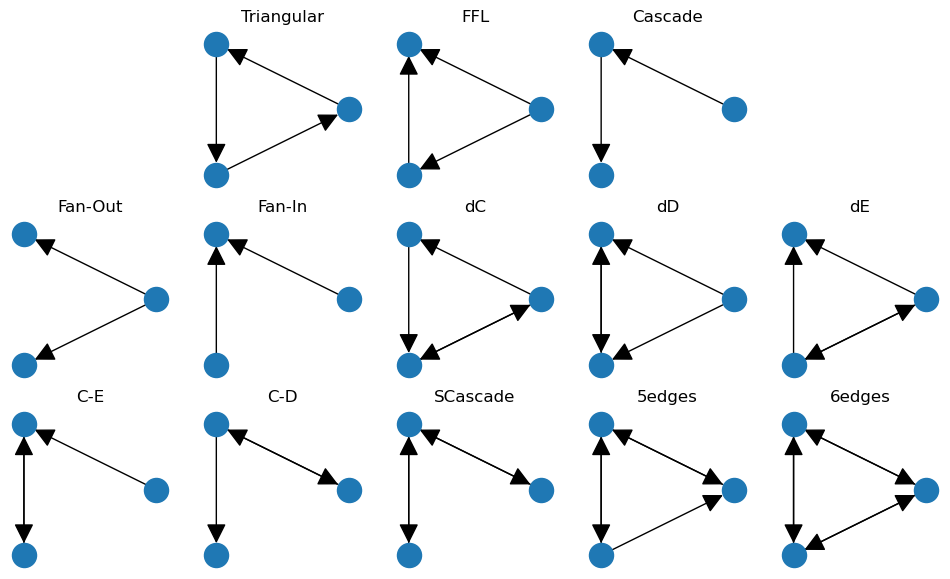

In [48]:
TGraph = [nx.DiGraph() for i in range(13)]
TGraph[0].add_edges_from([(0, 1), (1, 2), (2, 0)])
TGraph[1].add_edges_from([(1, 0), (1, 2), (2, 0)])
TGraph[2].add_edges_from([(0, 1), (1, 2)])
TGraph[3].add_edges_from([(1, 0), (1, 2)])
TGraph[4].add_edges_from([(0, 1), (2, 1)])
TGraph[5].add_edges_from([(0, 1), (1, 2), (2, 0), (0, 2)])
TGraph[6].add_edges_from([(1, 0), (1, 2), (2, 0), (0, 2)])
TGraph[7].add_edges_from([(0, 1), (2, 1), (2, 0), (0, 2)])
TGraph[8].add_edges_from([(0, 1), (1, 2), (2, 1)])
TGraph[9].add_edges_from([(0, 1), (1, 2), (1, 0)])
TGraph[10].add_edges_from([(0, 1), (1, 2), (1, 0), (2, 1)])
TGraph[11].add_edges_from([(0, 1), (1, 2), (1, 0), (2, 1), (2, 0)])
TGraph[12].add_edges_from([(0, 1), (1, 2), (1, 0), (2, 1), (2, 0), (0, 2)])
def findGroup(Graph):
    grn = oGRN.GrnFromAdj(nx.to_numpy_array(Graph))
    return list(grn["subGraph"].values())[0]
for i in range(3):
    plt.subplot(3, 5, i+2)
    nx.draw_circular(TGraph[i], arrowsize=30)
    plt.title(findGroup(TGraph[i]))
for i in range(5):
    plt.subplot(3, 5, i+6)
    nx.draw_circular(TGraph[i+3], arrowsize=30)
    plt.title(findGroup(TGraph[i+3]))
for i in range(5):
    plt.subplot(3, 5, i+11)
    nx.draw_circular(TGraph[i+8], arrowsize=30)
    plt.title(findGroup(TGraph[i+8]))
